<a href="https://colab.research.google.com/github/tnqkrghd/NLP/blob/main/%ED%8A%B8%EB%9E%9C%EC%8A%A4%ED%8F%AC%EB%A8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. 요약

* RNN 대신 어텐션만 사용한 인코더-디코더 구조
* 3개의 멀티 헤드 어텐션
* 낮은 계산 복잡도, 병렬화 용이, 다양한 시각


### 1. 모델 소개

* 언어 모델링과 기계 번역 같은 태스크들을 잘 처리하던 모델들은 RNN 혹은 Convolution 기반의 복잡한 인코더-디코더 구조를 갖는 구조였습니다.

* 이런 모델들의 가장 큰 특징은 Sequential, 즉 정보를 순차적으로 받아서 처리한다는 점입니다. 그렇기 때문에 이전의 정보를 기억하는 동시에 최신의 정보로 업데이트를 해나갈 수 있다는 장점이 있죠.

* 하지만, 단점도 있습니다. 특히 긴 문장을 학습할 때 문제가 발생하는데, 문장이 길어질수록 학습에 더 많은 자원이 필요하게 된다는 점입니다. 이러한 점은 병렬화를 막아 성능 향상에 큰 장애물이 됩니다.

* 우리가 다루어 볼 이 논문에서 제안한 Transformer 는 인코더-디코더 구조를 갖는다는 점에서 기존의 것들과 동일합니다. 대신, RNN 혹은 Convolution 이 아닌 Attention Mechanism 만을 사용해서 인코더-디코더 구조를 이룬다는 것이 차별화된 점입니다.

* 그렇다면, Attention Mechanism 이 무엇인지에 대해 먼저 짚고 넘어가겠습니다.

### 2. seq2seq, 그리고 attention

* seq2seq 모델은 간단히 말해서, 입력 받은 시퀀스 데이터를 인코더에서 인코딩하고, 인코딩된 정보를 전달받은 디코더는 출력 시퀀스를 만들어 내는 방식입니다. 이때, 인코더의 출력은 '고정된 길이의 벡터' 입니다.

* 즉, 입력 문장의 길이에 관계없이 고정된 길이의 벡터로 정보를 밀어 넣다보니 정보의 손실이 발생할 수 밖에 없습니다. 여기에 RNN 의 고질적인 문제인 기울기 소실 문제까지 더해진 상황에서, 이러한 문제점들을 보정해주기 등장한 기법이 바로 어텐션(attention)입니다.

* 어텐션의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점(time step)마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점입니다. 단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 보게 됩니다.

* 처음에는 어텐션이라는 기법이 RNN 기반의 seq2seq의 성능을 향상시켜주기 위해 등장하였지만, 나중에는 어텐션 스스로가 기존의 seq2seq를 대체하는 방법이 되어버렸고, 그것이 바로 우리가 다루는 트랜스포머(Transformer) 입니다.


### 3. 모델 구조

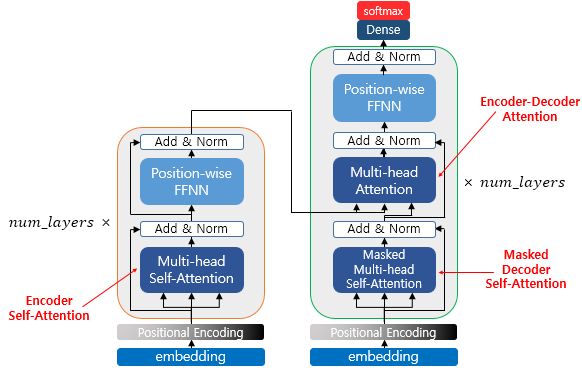

* 트랜스포머는 RNN을 사용하지 않지만 기존의 seq2seq처럼 인코더에서 입력 시퀀스를 입력받고, 디코더에서 출력 시퀀스를 출력하는 인코더-디코더 구조를 유지하고 있습니다. 다만 다른 점은 인코더와 디코더라는 단위가 N개가 존재할 수 있다는 점입니다.

* 이전 seq2seq 구조에서는 인코더와 디코더에서 각각 하나의 RNN이 t개의 시점(time-step)을 가지는 구조였다면 이번에는 인코더와 디코더라는 단위가 N개로 구성되는 구조입니다. 트랜스포머를 제안한 논문에서는 인코더와 디코더의 개수를 각각 6개를 사용하였습니다.

#### 3.1. 트랜스포머의 입력, 포지셔널 인코딩(Positional Encoding)

* RNN이 자연어 처리에서 유용했던 이유는 단어의 위치에 따라 단어를 순차적으로 입력받아서 처리하기에, 각 단어의 위치 정보(position information)를 가질 수 있다는 점에 있었습니다.

* 하지만 트랜스포머는 그런 방식이 아니기 때문에 단어의 위치 정보를 다른 방식으로 알려줄 필요가 있습니다. 그래서 트랜스포머에선 각 단어의 임베딩 벡터에 위치 정보들을 더하여 모델의 입력으로 사용하는데, 이를 포지셔널 인코딩(positional encoding)이라고 합니다.

* 예를 들어 각 임베딩 벡터에 포지셔널 인코딩값을 더하면 같은 단어라고 하더라도 문장 내의 위치에 따라서 트랜스포머의 입력으로 들어가는 임베딩 벡터의 값이 달라집니다. 결국 트랜스포머의 입력은 순서 정보가 고려된 임베딩 벡터라고 보면 되겠습니다.

#### 3.2 인코더

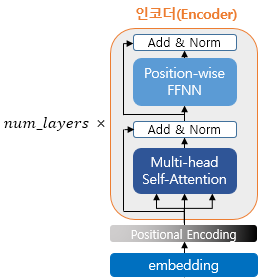

* 트랜스포머는 N개의 인코더 층을 쌓습니다. 그리고 하나의 층은 2개의 서브 층으로 이루어져 있습니다. 

* 하나는 Multi-head Self-Attention 이고, 다른 하나는 Position-wise fully connected feed-forward 신경망입니다.

* 멀티 헤드 셀프 어텐션은 셀프 어텐션을 병렬적으로 사용하였다는 의미고, 포지션 와이즈 피드 포워드 신경망은 우리가 알고있는 일반적인 피드 포워드 신경망입니다.

#### 3.3 멀티 헤드 셀프 어텐션

* 어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구합니다. 그리고 구해낸 이 유사도를 가중치로 하여 키와 맵핑되어있는 각각의 '값(Value)'에 반영해줍니다. 그리고 유사도가 반영된 '값(Value)'을 모두 가중합하여 리턴합니다.

* 셀프 어텐션(self-attention)이라 함은, 어텐션을 단지 자기 자신에게 수행한다는 의미입니다.

* 기존 어텐션에서는 디코더 셀의 은닉 상태가 Q이고 인코더 셀의 은닉 상태가 K라는 점에서 Q와 K가 서로 다른 값을 가지고 있었습니다. 그런데 셀프 어텐션에서는 Q, K, V가 전부 동일합니다. 트랜스포머의 셀프 어텐션에서의 Q, K, V는 아래와 같습니다.

  ```
Q : 입력 문장의 모든 단어 벡터들
K : 입력 문장의 모든 단어 벡터들
V : 입력 문장의 모든 단어 벡터들
  ```

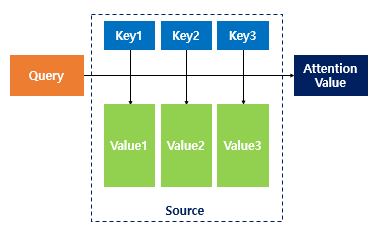

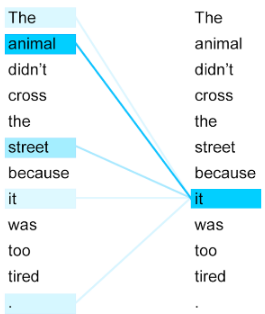

* 셀프 어텐션을 통해 얻을 수 있는 대표적인 효과는 문장 내의 단어들끼리 유사도를 구하기 때문에 각 단어가 다른 단어와 얼마나 연관되어 있는지를 알아낼 수 있다는 점입니다.

* 위의 예시 문장을 번역하면 '그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.' 라는 의미가 됩니다. 그런데 여기서 그것(it)에 해당하는 것은 과연 길(street)일까요? 동물(animal)일까요? 우리는 피곤한 주체가 동물이라는 것을 아주 쉽게 알 수 있지만 기계는 그렇지 않습니다. 하지만 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구하므로서 그것(it)이 동물(animal)과 연관되었을 확률이 높다는 것을 찾아냅니다.
  - (사진 출처 : 트랜스포머에 대한 구글 AI 블로그 포스트)

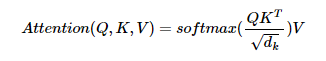

#### 3.4 포지션-와이즈 피드 포워드 신경망(Position-wise FFNN)

* 인코더와 디코더에서 공통적으로 가지고 있는 서브층으로, 간단히 아래와 같이 나타낼 수 있습니다.

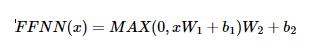

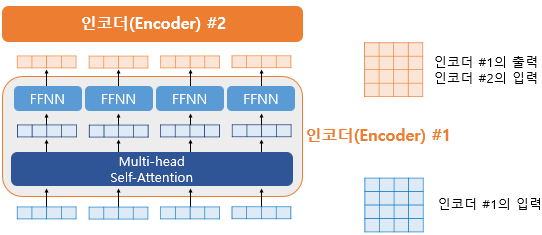

* 두번째 서브층을 지난 인코더의 최종 출력은 여전히 인코더의 입력의 크기였던 
d_model 의 크기가 보존되고 있습니다. 다른 인코더 층을 지날 때도 동일하게 연산이 반복됩니다.

#### 3.5 잔차 연결(Residual connection)과 층 정규화(Layer Normalization)

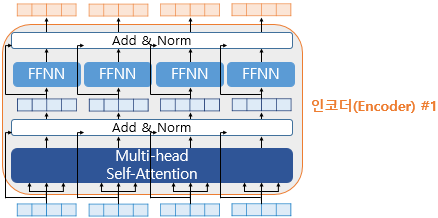

* 서브층이 멀티 헤드 어텐션이었다면 잔차 연결 연산은 다음과 같습니다.

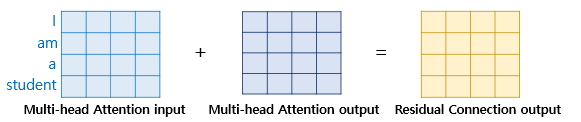

* 층 정규화는 텐서의 마지막 차원에 대해서 평균과 분산을 구하고, 이를 가지고 어떤 수식을 통해 값을 정규화하여 학습을 돕습니다. 

* 여기서 텐서의 마지막 차원이란 것은 트랜스포머에서는 d_model 차원을 의미합니다. 아래 그림은 d_model 차원의 방향을 화살표로 표현하였습니다.

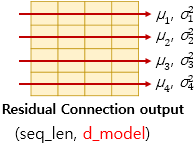

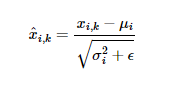

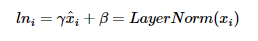

#### 3.6 디코더의 첫번째 서브층 : 셀프 어텐션과 룩-어헤드 마스크

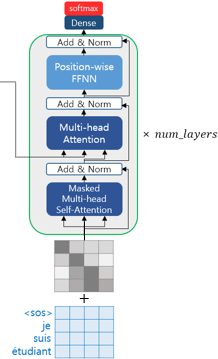

* 위 그림과 같이 디코더도 인코더와 동일하게 임베딩 층과 포지셔널 인코딩을 거친 후의 문장 행렬이 입력됩니다. 트랜스포머 또한 seq2seq와 마찬가지로 교사 강요(Teacher Forcing)을 사용하여 훈련되므로 학습 과정에서 디코더는 번역할 문장에 해당되는 <sos> je suis étudiant의 문장 행렬을 한 번에 입력받습니다. 그리고 디코더는 이 문장 행렬로부터 각 시점의 단어를 예측하도록 훈련됩니다.

* 여기서 문제가 있습니다. 기존 seq2seq의 디코더에 사용되는 RNN 계열의 신경망은 입력 단어를 매 시점마다 순차적으로 받으므로 다음 단어 예측에 현재 시점 이전 이전에 입력된 단어들만 참고할 수 있습니다. 반면, 트랜스포머는 문장 행렬로 입력을 한 번에 받으므로 현재 시점의 단어를 예측하고자 할 때, 입력 문장 행렬로부터 미래 시점의 단어까지도 참고할 수 있는 현상이 발생합니다. 

* 가령, suis를 예측해야 하는 시점이라고 해봅시다. seq2seq의 디코더라면 현재까지 디코더에 입력된 단어는 <sos>와 je뿐일 것입니다. 반면, 트랜스포머는 이미 문장 행렬로 <sos> je suis étudiant를 입력받았습니다.

* 이를 위해 트랜스포머의 디코더에서는 현재 시점의 예측에서 현재 시점보다 미래에 있는 단어들을 참고하지 못하도록 ***룩-어헤드 마스크(look-ahead mask)***를 도입했습니다. 직역하면 '미리보기에 대한 마스크'라고 할 수 있습니다.

* 룩-어헤드 마스크(look-ahead mask)는 디코더의 첫번째 서브층에서 이루어집니다. 디코더의 첫번째 서브층인 멀티 헤드 셀프 어텐션 층은 인코더의 첫번째 서브층인 멀티 헤드 셀프 어텐션 층과 동일한 연산을 수행합니다. 오직, 다른 점은 어텐션 스코어 행렬에서 마스킹을 적용한다는 점만 다릅니다. 우선, 다음과 같이 셀프 어텐션을 통해 어텐션 스코어 행렬을 얻습니다.


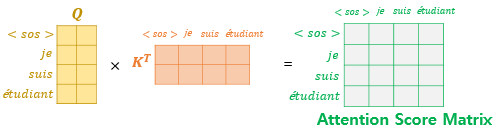

* 이제 자기 자신보다 미래에 있는 단어들은 참고하지 못하도록 다음과 같이 마스킹합니다.

* 마스킹 된 후의 어텐션 스코어 행렬의 각 행을 보면 자기 자신과 그 이전 단어들만을 참고할 수 있음을 볼 수 있습니다. 그 외에는 근본적으로 셀프 어텐션이라는 점과, 멀티 헤드 어텐션을 수행한다는 점에서 인코더의 첫번째 서브층과 같습니다.

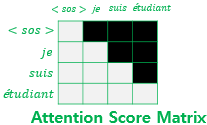

#### 3.7 디코더의 두번째 서브층 : 인코더-디코더 어텐션

* 셀프 어텐션은 Query, Key, Value가 같은 경우를 말하는데, 인코더-디코더 어텐션은 Query가 디코더인 행렬인 반면, Key와 Value는 인코더 행렬이기 때문입니다. 다시 한 번 각 서브층에서의 Q, K, V의 관계를 정리해봅시다.

  ```
인코더의 첫번째 서브층 : Query = Key = Value
디코더의 첫번째 서브층 : Query = Key = Value
디코더의 두번째 서브층 : Query : 디코더 행렬 / Key = Value : 인코더 행렬
  ```

* Query가 디코더 행렬, Key가 인코더 행렬일 때, 어텐션 스코어 행렬을 구하는 과정은 다음과 같습니다.

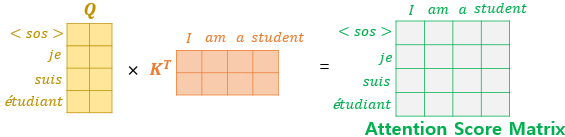

### 4. 왜 셀프 어텐션인가?

* 층마다 드는 전체 계산 복잡도
  - 문장의 길이 n 이 표현의 차원이 d 보다 작다면, self-attention 층은 recurrent 층보다 훨씬 빠르다.

* 병렬화가 가능한 계산의 총합

* 긴 범위의 의존성을 갖는 표현들 사이의 경로 길이(path length)